# Create the S/N < 5 mask

This is a code snippet to create the S/N < 5 mask which masks out all default masked spaxels and all spaxels where the H$\alpha$ signal-to-noise ratio is less than 5

## import necessary packages and read in master table

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy.ma as ma

In [8]:
DATA_FOLDER = '/Users/nityaravi/Documents/Research/RotationCurves/data/manga/'
VEL_MAP_FOLDER = DATA_FOLDER + 'DR17/'

In [9]:
master_table_fn = DATA_FOLDER + 'output_files/DR17/CURRENT_MASTER_TABLE/Elliptical_sphdisk_refitspirals_BPT_v9.fits'
master_table = Table.read(master_table_fn)
master_table[:5]

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag,nsa_elpetro_absmag,nsa_elpetro_amivar,nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction,nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux,nsa_petro_flux_ivar,nsa_elpetro_flux,nsa_elpetro_flux_ivar,nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux,nsa_sersic_flux_ivar,smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,Rmax,M,M_err,fit_flag,Sigma_disk,Sigma_disk_err,R_disk,R_disk_err,rho_bulge,rho_bulge_err,R_bulge,R_bulge_err,M90_disk,M90_disk_err,M_disk,M_disk_err,chi2_disk,WF50,WF50_err,DL_ttype,vis_tidal,b,b_err,M_R90,M_R90_err,fit_function,A_g,A_r,logH2,R90_kpc,v_3p5,v_3p5_err,NSA_plate,NSA_fiberID,NSA_MJD,logH2_CG,logH2_CG_err,logH2_M,Z,Z_err,M_Z,M_Z_err,grad_Z,grad_Z_err,Z_0,Z_0_err,SFR,sSFR,SFR_err,sSFR_err,Flux_OII_3726,Flux_OII_3726_Err,Flux_OII_3728,Flux_OII_3728_Err,Flux_OIII_4958,Flux_OIII_4958_Err,Flux_OIII_5006,Flux_OIII_5006_Err,Flux_NII_6547,Flux_NII_6547_Err,Flux_NII_6583,Flux_NII_6583_Err,Flux_Ha_6562,Flux_Ha_6562_Err,Flux_Hb_4861,Flux_Hb_4861_Err,CMD_class,rabsmag_NSA,param_H2,param_H2_err,Z_map,Z_err_map,M_Z_map,M_Z_err_map,logHI_R90,Mvir,Mvir_err,star_sigma,star_sigma_err,dipole_moment,Rgal,vflag_VF,nsa_elpetro_log_mass,rabsmag,param_H2_R90,logHe,sphd_rho_c,sphd_rho_c_err,sphd_R_scale,sphd_R_scale_err,sphd_Sigma_d,sphd_Sigma_d_err,sphd_R_d,sphd_R_d_err,sphd_M_star,sphd_M_star_err,sphd_chi2,mhq_R_scale,mhq_R_scale_err,mhq_M_star,mhq_M_star_err,mhq_gamma,mhq_gamma_err,mhq_chi2,hq_R_scale,hq_R_scale_err,hq_M_star,hq_M_star_err,hq_chi2,sph_rho_c,sph_rho_c_err,sph_R_scale,sph_R_scale_err,sph_M_star,sph_M_star_err,sph_chi2,sum_M_star,sum_M_star_err,BPT_class,spiral_mask,elliptical_mask,Age_LW_Re_fit,Age_MW_Re_fit,ZH_LW_Re_fit,ZH_MW_Re_fit,M90_disk_h,M90_disk_err_h,sphd_M_star_err_h,sphd_M_star_h,V_R90,V_R90_err,e_M_star_R90,e_M_star_R90_err,e_M_star_R90_h,e_M_star_R90_err_h,v_eff,v_eff_err,logHI,logHI_err,HI_catalog,logHI_h,logHI_err_h,N2Ha,O3Hb
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64,float64,float64[7],float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64[7],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,fl

In [10]:
master_table_dict = {}
for i in range(len(master_table)):

    master_table_dict[master_table['plateifu'][i]] = i

## extract maps for test galaxy 7443-12704
we need the H$\alpha$ velocity map, velocity map mask, flux map, and flux inverse variance to get the H$\alpha$ S/N mask. For the stellar velocity map, we'll need the stellar velocity map, mask, and stellar velocity inverse variance

In [31]:
test_gal = '7443-12704'
plate, ifu = test_gal.split('-')
cube = fits.open(VEL_MAP_FOLDER + plate + '/' + ifu + '/manga-7443-12704-MAPS-HYB10-MILESHC-MASTARSSP.fits.gz')

# extract the stellar velocity maps

stellar_vel = cube['STELLAR_VEL'].data         
stellar_vel_ivar = cube['STELLAR_VEL_IVAR'].data 
stellar_mask = cube['STELLAR_VEL_MASK'].data

# extract the halpha velocity maps

halpha_vel = cube['EMLINE_GVEL'].data[23]        
halpha_vel_ivar = cube['EMLINE_GVEL_IVAR'].data[23]
halpha_vel_mask = cube['EMLINE_GVEL_MASK'].data[23]

# extract the halpha flux maps

halpha_flux = cube['EMLINE_GFLUX'].data[23]
halpha_flux_ivar = cube['EMLINE_GFLUX_IVAR'].data[23]



## plot the H$\alpha$ velocity map and flux

Text(0.5, 1.0, '7443-12704 H$\\alpha$ flux map')

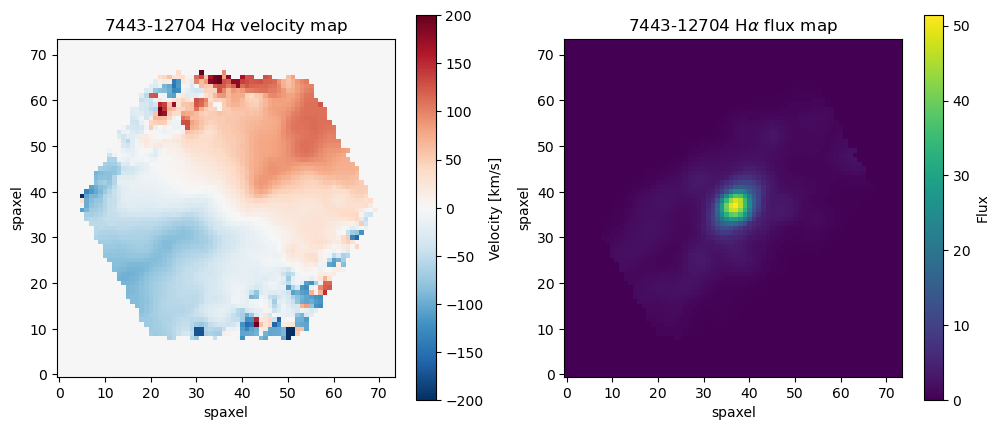

In [72]:
fig, ax = plt.subplots(1,2, figsize=(12,5))


im1 = ax[0].imshow(halpha_vel, cmap='RdBu_r', vmax=200, vmin=-200)
fig.colorbar(im1, label='Velocity [km/s]')
im2 = ax[1].imshow(halpha_flux)
fig.colorbar(im2,  label='Flux')



for i in range(2):
    ax[i].invert_yaxis()
    ax[i].set_xlabel('spaxel')
    ax[i].set_ylabel('spaxel')


ax[0].set_title(test_gal + r' H$\alpha$ velocity map')
ax[1].set_title(test_gal + r' H$\alpha$ flux map')

## construct the signal to noise mask
we want the mask to be True where the S/N < 5 and false where we have a good S/N

In [107]:
halpha_vel_SN_mask = np.abs(halpha_flux*np.sqrt(halpha_flux_ivar)) < 5

Text(0.5, 1.0, '7443-12704 H$\\alpha$ flux S/N < 5 mask')

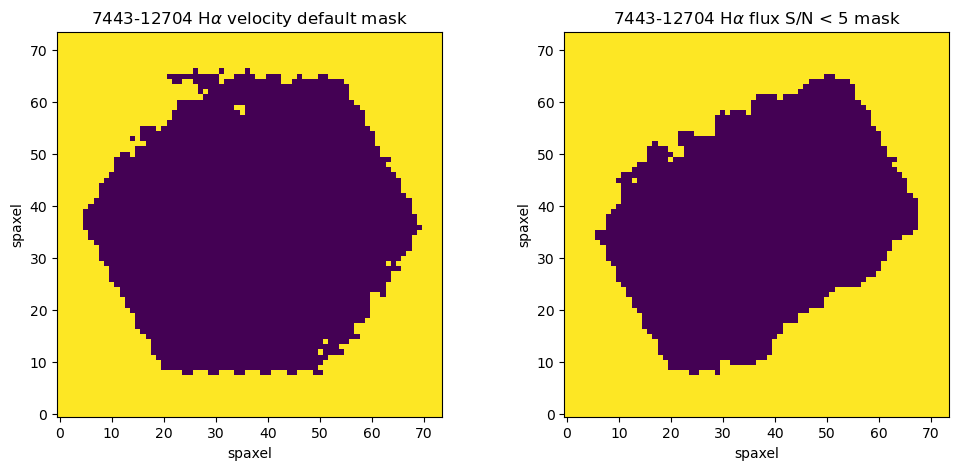

In [108]:
# plot the default mask and SN mask just to see
fig, ax = plt.subplots(1,2, figsize=(12,5))


im1 = ax[0].imshow(halpha_vel_mask)
im2 = ax[1].imshow(halpha_vel_SN_mask)



for i in range(2):
    ax[i].invert_yaxis()
    ax[i].set_xlabel('spaxel')
    ax[i].set_ylabel('spaxel')


ax[0].set_title(test_gal + r' H$\alpha$ velocity default mask')
ax[1].set_title(test_gal + r' H$\alpha$ flux S/N < 5 mask')

notice how the S/N mask and default mask don't mask the same spaxels

### apply masks to H$\alpha$ velocity map

In [109]:
mhalpha_vel_default = ma.array(halpha_vel, mask = halpha_vel_mask)
mhalpha_vel_SN = ma.array(halpha_vel, mask=halpha_vel_SN_mask)

Text(0.5, 1.0, '7443-12704 H$\\alpha$ velocity with S/N < 5 mask')

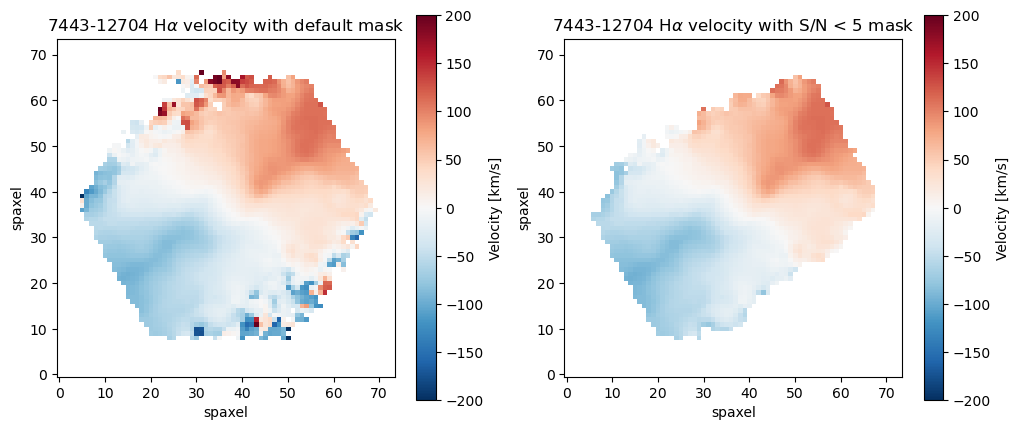

In [110]:
# plot the velocity maps with masks applied
fig, ax = plt.subplots(1,2, figsize=(12,5))


im1 = ax[0].imshow(mhalpha_vel_default, cmap='RdBu_r', vmin=-200, vmax=200)
fig.colorbar(im1, label='Velocity [km/s]')

im2 = ax[1].imshow(mhalpha_vel_SN,cmap='RdBu_r', vmin=-200, vmax=200)
fig.colorbar(im2, label='Velocity [km/s]')



for i in range(2):
    ax[i].invert_yaxis()
    ax[i].set_xlabel('spaxel')
    ax[i].set_ylabel('spaxel')


ax[0].set_title(test_gal + r' H$\alpha$ velocity with default mask')
ax[1].set_title(test_gal + r' H$\alpha$ velocity with S/N < 5 mask')

### let's repeat this for the stellar velocity map

Text(0.5, 1.0, '7443-12704 stellar velocity map')

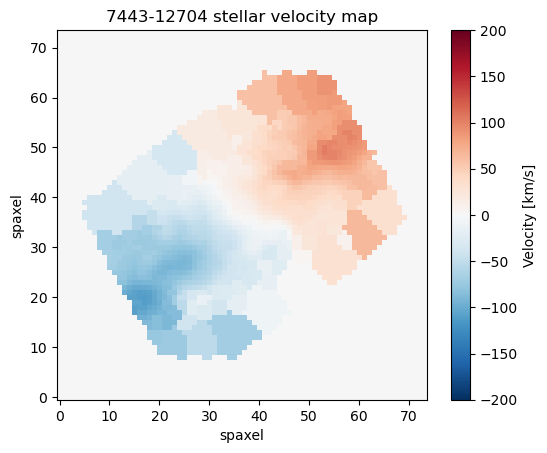

In [111]:
plt.imshow(stellar_vel, cmap='RdBu_r', vmax=200, vmin=-200)
plt.colorbar(label='Velocity [km/s]')

plt.gca().invert_yaxis()
plt.xlabel('spaxel')
plt.ylabel('spaxel')


plt.title(test_gal + r' stellar velocity map')


In [112]:
stellar_vel_SN_mask = np.abs(stellar_vel*np.sqrt(stellar_vel_ivar)) < 5

Text(0.5, 1.0, '7443-12704 stellar velocity S/N < 5 mask')

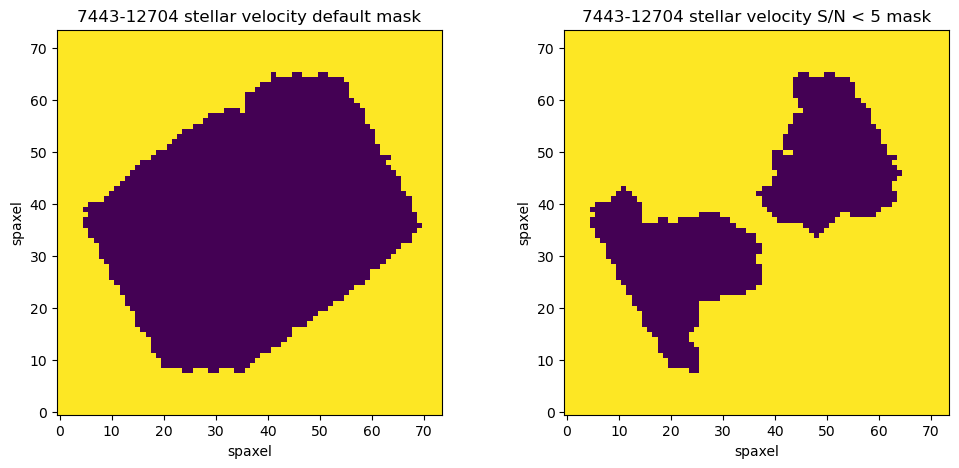

In [113]:
# plot the default mask and SN mask just to see
fig, ax = plt.subplots(1,2, figsize=(12,5))


im1 = ax[0].imshow(stellar_mask)
im2 = ax[1].imshow(stellar_vel_SN_mask)



for i in range(2):
    ax[i].invert_yaxis()
    ax[i].set_xlabel('spaxel')
    ax[i].set_ylabel('spaxel')


ax[0].set_title(test_gal + r' stellar velocity default mask')
ax[1].set_title(test_gal + r' stellar velocity S/N < 5 mask')

The S/N mask does not mask any spaxels. This makes sense since the spaxels are binned to reach a minimum signal-to-noise of 10 for analysis, but we'll do this anyway for completion.

In [114]:
mstellar_vel_default = ma.array(stellar_vel, mask=stellar_mask)
mstellar_vel_SN = ma.array(stellar_vel, mask=stellar_vel_SN_mask)

Text(0.5, 1.0, '7443-12704 stellar velocity with S/N < 5 mask')

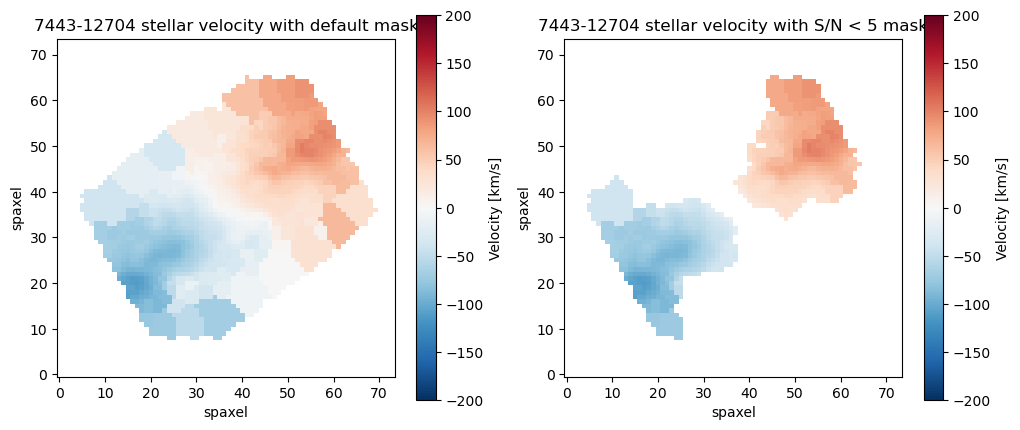

In [115]:
# plot the velocity maps with masks applied
fig, ax = plt.subplots(1,2, figsize=(12,5))


im1 = ax[0].imshow(mstellar_vel_default, cmap='RdBu_r', vmin=-200, vmax=200)
fig.colorbar(im1, label='Velocity [km/s]')

im2 = ax[1].imshow(mstellar_vel_SN,cmap='RdBu_r', vmin=-200, vmax=200)
fig.colorbar(im2, label='Velocity [km/s]')



for i in range(2):
    ax[i].invert_yaxis()
    ax[i].set_xlabel('spaxel')
    ax[i].set_ylabel('spaxel')


ax[0].set_title(test_gal + r' stellar velocity with default mask')
ax[1].set_title(test_gal + r' stellar velocity with S/N < 5 mask')

### here is the code you will use to create the two masks

In [116]:
halpha_mask = np.logical_or(halpha_vel_mask, np.abs(halpha_flux*np.sqrt(halpha_flux_ivar)) < 5) # this is true when either the default
                                                                                                # mask or the signal to noise mask is true

stellar_vel_mask = np.logical_or(stellar_mask, np.abs(stellar_vel*np.sqrt(stellar_vel_ivar)) < 5)

Text(0.5, 1.0, '7443-12704 stellar velocity map')

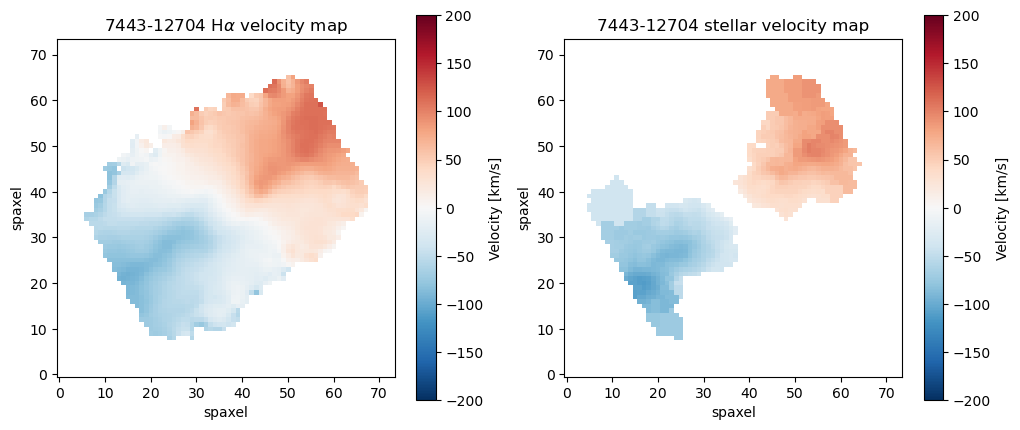

In [118]:
### plot the two maps with the masks applied
fig, ax = plt.subplots(1,2, figsize=(12,5))


im1 = ax[0].imshow(ma.array(halpha_vel, mask=halpha_mask), cmap='RdBu_r', vmax=200, vmin=-200)
im2 = ax[1].imshow(ma.array(stellar_vel, mask=stellar_vel_mask), cmap='RdBu_r', vmax=200, vmin=-200)
fig.colorbar(im1, label='Velocity [km/s]')

fig.colorbar(im2, label='Velocity [km/s]')



for i in range(2):
    ax[i].invert_yaxis()
    ax[i].set_xlabel('spaxel')
    ax[i].set_ylabel('spaxel')


ax[0].set_title(test_gal + r' H$\alpha$ velocity map')
ax[1].set_title(test_gal + r' stellar velocity map')